# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [68]:
import pandas as pd
import numpy as np
%matplotlib inline

---
## Step 0: Load The Data

In [69]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [70]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = 39209

# TODO: Number of testing examples.
n_test = 12630

# TODO: What's the shape of an traffic sign image?
image_shape = (32, 32, 3)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

14


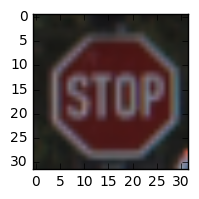

In [71]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(2,2))
plt.imshow(image)
print(y_train[index])

### Label distibution

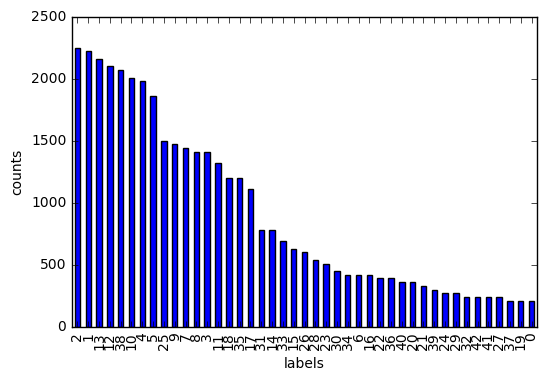

In [72]:
df_y = pd.Series(y_train)
label_counts = df_y.value_counts()
label_counts.plot(kind='bar')
ax = plt.gca()
ax.set_xlabel('labels')
ax.set_ylabel('counts')

### Min and Max of image channels

In [73]:
#Data within expected [0, 255] range
print (X_train.min(), X_train.max())

0 255


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [74]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [75]:
FINAL = True
GRAY = True

In [76]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

def rgb2gray_(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def normalize_gray(img):
    return img/255.

def rgb2gray(X):
    shape = list(X.shape)
    shape[-1] = 1
    return np.array([rgb2gray_(img) for img in X]).reshape(shape)

if GRAY:
    X_train = rgb2gray(X_train)
    X_train = normalize_gray(X_train)
    X_test = rgb2gray(X_test)
    X_test = normalize_gray(X_test)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

1. I converted rgb to gray scale. LeNet run with rgb and gray-scale images resulted in a very similar cross-entropy (0.942 vs 0.948). I decided to choose the gray scale as the resulting model is simpler and faster. 
2. For normalization is used min-max normalization as there are no outliers in data. Normalization improved the performance to 0.968.

In [10]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Generate synthetic data

In [12]:
import cv2
def generata_translations(X, y, dx=2, dy=2):
    M = np.float32([[1,0,dx],[0,1,dy]])
    X_new, y_new = [], []
    for img, label in zip(X, y):
        X_new.append(cv2.warpAffine(np.array(img), M, (32,32)))
        y_new.append(label)
    y_new = np.array(y_new)
    X_new = np.array(X_new)
    X_new = X_new.reshape(list(X_new.shape) + [1,])
    return X_new, y_new

X1, y1 = generata_translations(X_train, y_train)
X2, y2 = generata_translations(X_train, y_train, dx=-2, dy=-2)

X_train = np.concatenate([X_train, X1, X2])
y_train = np.concatenate([y_train, y1, y2])

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

1. I kept the test set of 12k images separated from the model selection process (preprocessing, modifying the net architecture and tuning optimization parameters). The test set is used only once, after the model is finalized. To create validation set I randomly selected 20% of the train set. The resulting validation set has about 12k images. 

2. To generate additional data I translated images by vectors [2,2] and [-2,-2] pixels. Increased data set size improve  the performance to 0.984.

In [13]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [14]:
import tensorflow as tf

EPOCHS = 17
BATCH_SIZE = 64

In [15]:
if GRAY: input_depth = 1
else: input_depth = 3

### Model

In [16]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x10.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, input_depth, 10), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(10))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x10. Output = 14x14x10.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x24.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 10, 24), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(24))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x24. Output = 5x5x24.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x24. Output = 600.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 200.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(600, 200), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(200))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 200. Output = 100.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(200, 100), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(100))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 100. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(100, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My final model is a convolutional network with LeNet architecture:  two convolutional layers with max pooling and relu activation followed by two fully connected layers with 200 and 100 neurons, respectively, and the output layer:
- Layer 1: 
    * Convolutional (Input = 32x32x1. Output = 28x28x10)
    * Relu Activation
    * Max Pooling (Input = 28x28x10. Output = 14x14x10)
- Layer 2:
    * Convolutional (Input = 14x14x10. Output = 10x10x24)
    * Relu Activation
    * Max Pooling (Input = 10x10x24. Output = 5x5x24)
- Layer 3:
    * Fully Connected (Input = 600. Output = 200)
    * Relu Activation
- Layer 4:
    * Fully Connected (Input = 200. Output = 100)
    * Relu Activation
- Layer 5:
    * Fully Connected (Input = 100. Output = 43)

In [17]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Features and Labels

In [18]:
x = tf.placeholder(tf.float32, (None, 32, 32, input_depth))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

### Training pipeline

In [19]:
rate = 0.0005

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model evaluation

In [20]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train the model

In [21]:
with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet')
    print("Model saved")

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Training...

EPOCH 1 ...
Validation Accuracy = 0.878

EPOCH 2 ...
Validation Accuracy = 0.951

EPOCH 3 ...
Validation Accuracy = 0.963

EPOCH 4 ...
Validation Accuracy = 0.974

EPOCH 5 ...
Validation Accuracy = 0.978

EPOCH 6 ...
Validation Accuracy = 0.981

EPOCH 7 ...
Validation Accuracy = 0.984

EPOCH 8 ...
Validation Accuracy = 0.985

EPOCH 9 ...
Validation Accuracy = 0.986

EPOCH 10 ...
Validation Accuracy = 0.984

EPOCH 11 ...
Validation Accuracy = 0.985

EPOCH 12 ...
Validation Accuracy = 0.989

EPOCH 13 ...
Validation Accuracy = 0.984

EPOCH 14 ...
Validation Accuracy = 0.991

EPOCH 15 ...
Validation Accuracy = 0.989

EPOCH 16 ...
Validation Accuracy = 0.990

EPOCH 17 ...
Validation Accuracy = 0.991

Model saved


### Final Evaluation

In [77]:
if FINAL:
  with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.922


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

As optimizer I chose  Adam algorithm as it has better convergence properties and requires less parameter tuning than gradient descent. To select batch size, learning rate I varied one parameter while keeping others fixed:
1. Test learning rate
    * Epoch = 20
    * Batch size = 128
    * Learning rates in (0.005, 0.001, 0.0005). Selected learning rate =  0.001
2. Test batch size:
    * Epoch = 20
    * Batch size in (64, 128, 256). Selected Batch size = 64
    * Learning rates 0.005, 0.001, 0.0005. Selected learning rate =  0.001
3. Test learning rate
    * Epoch = 20
    * Batch size = 64
    * Learning rates in (0.005, 0.001, 0.0005). Selected learning rate =  0.005
 
The validation error reaches minimum after 19 epochs. The final model:
    * Epoch = 17
    * Batch size = 64
    * Learning rates =  0.005
    gives cross entropy error of 0.991 in the validation set and 0.921 in test set.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I started with LeNet architecture as it performed very well in the MNIST digit classification problem. Because both MNIST and traffic sign images have the same dimensions I kept convolution filter at 5x5 and max-pooling at 2x2. These values were also suggested in http://deeplearning.net/tutorial/lenet.html.

Because traffic sign images may be richer in features than digits I increased the size of fully connected layers and the depth of convolutional layers (number of channels). Both these changes improved the performance.

Overall the process was a mix of trail and error, application of knowledge gained from the course and some research.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [23]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [24]:
# Import Pillow:
import numpy as np
import PIL
from PIL import Image
import matplotlib.pyplot as plt

In [25]:
imgs = [
    Image.open("sign1.jpg").crop((100, 0, 600, 500)).resize((32,32), PIL.Image.ANTIALIAS),
    Image.open("sign2.jpg").crop((150, 50, 900, 700)).resize((32,32), PIL.Image.ANTIALIAS),
    Image.open("sign3.jpg").crop((0, 100, 200, 300)).resize((32,32), PIL.Image.ANTIALIAS),
    Image.open("sign3.jpg").crop((45, 180, 155, 290)).resize((32,32), PIL.Image.ANTIALIAS),
    Image.open("sign3.jpg").crop((40, 80, 160, 200)).resize((32,32), PIL.Image.ANTIALIAS),
    Image.open("sign4.jpg").crop((1000, 100, 1250, 350)).resize((32,32), PIL.Image.ANTIALIAS), 
    Image.open("sign5.jpg").crop((700, 100, 1500, 900)).resize((32,32), PIL.Image.ANTIALIAS), 
    Image.open("sign6.jpg").crop((185, 80, 210, 105)).resize((32,32), PIL.Image.ANTIALIAS)
    ]
imgs_array = np.array([np.array(img) for img in imgs])

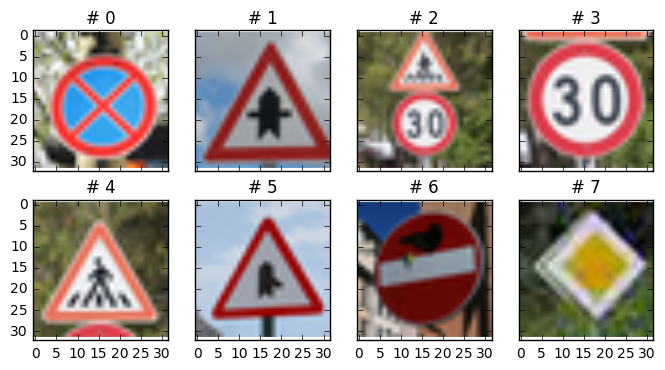

In [36]:
f, axs = plt.subplots(2, 4, sharex='col', sharey='row', figsize=(8,4))
axs = axs.reshape(8)
for ax, img, i in zip(axs, imgs, range(8)):
    ax.set_title('# %d' % i)
    ax.imshow(img)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

* Images number 0 and 4 are not included in the train set. 
* Image number 2 has two signs
* Image number 6 has a black sticker on it


In [27]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

In [28]:
imgs_array = rgb2gray(imgs_array)
imgs_array = normalize_gray(imgs_array)

In [37]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    probas = sess.run(tf.nn.softmax(logits), feed_dict={x: imgs_array})
    output = sess.run(tf.argmax(probas, 1))
    top_n = sess.run(tf.nn.top_k(probas, k=3))

In [38]:
import csv
with open('signnames.csv') as f:
    labels = dict(filter(None, csv.reader(f)))

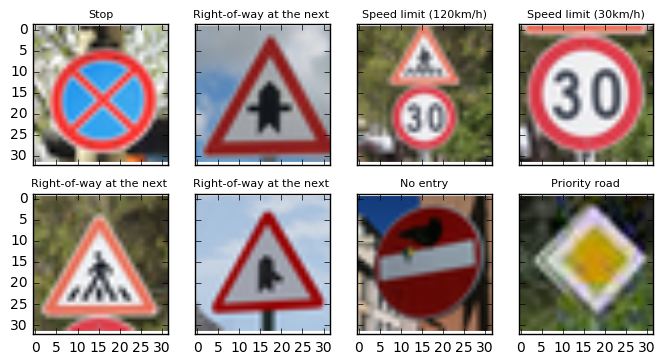

In [39]:
f, axs = plt.subplots(2, 4, sharex='col', sharey='row', figsize=(8,4))
#plt.subplots_adjust( wspace=5)
axs = axs.reshape(8)
for ax, img, label in zip(axs, imgs, output):
    ax.imshow(img)
    ax.set_title(labels[str(label)][:25], fontdict={'fontsize':8})

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

Excluding images that are out-of-sample,  the classifier did pretty well  (accuracy of 100%). Incorrectly classified images are only the two with labels  not included in the training set and the image with two signs. Interestingly, the model recognized that the image with two signs contains the seed limit sign, but incorrectly classified its value as 120 where it should be 30 kmh.

In [40]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

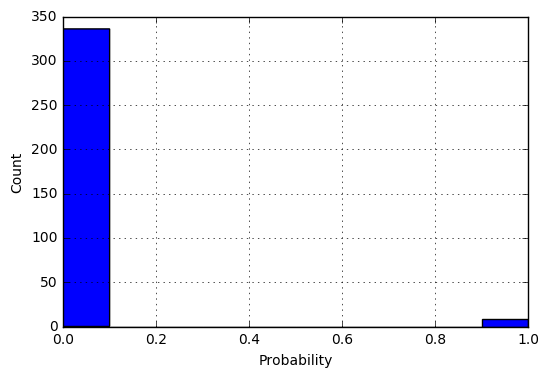

In [51]:
pd.Series(probas.reshape(8*43)).hist()
ax = plt.gca()
ax.set_xlabel('Probability')
ax.set_ylabel('Count')

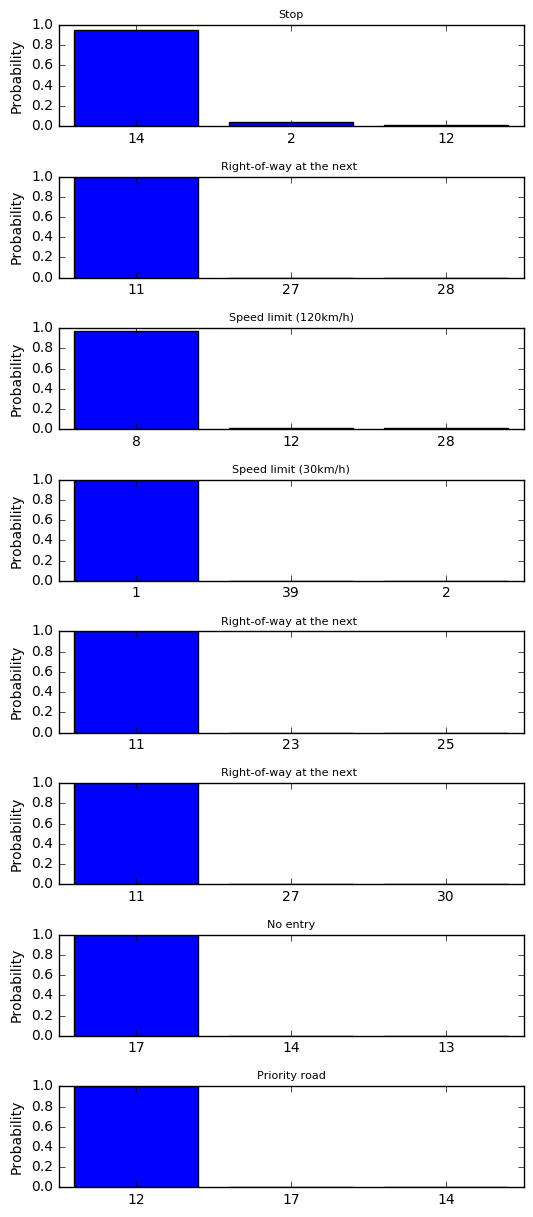

In [64]:
f, axs = plt.subplots(8, 1, figsize=(6,15))
width = 0.35
#plt.subplots_adjust( wspace=5)
axs = axs.reshape(8)
for ax, value, index, label in zip(axs, top_n.values, top_n.indices, output):
    ax.set_ylim([0, 1])
    plt.subplots_adjust( hspace=0.5)
    ax.set_title(labels[str(label)][:25], fontdict={'fontsize':8})
    ypos = np.arange(3)
    ax.bar(ypos, value, align='center')
    ax.set_xticks(ypos)
    ax.set_xticklabels(index)
    ax.set_ylabel('Probability')


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

Overall, the classifier is very certain in all the cases. Histogram of probabilities shows essentially two values: 1 and 0. Interesting this high certainly also holds for signs that were incorrectly classified (signs that were not included in the training set).

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.